# Información del dataset
El dataset "Absenteeism at work" creado por Andrea Martiniano y Ricardo Ferreira y con ubicación en el repositorio de UC Irvine Machine Learning Repository contiene alrededor de 700 registros sobre los registros de absentismo laboral presentados en una compañía de correos en Brazil de Julio de 2007 a Julio de 2010.

Fuentes:

1. [UC Irvine Machine Learning Repository | Absenteeism at work](https://archive.ics.uci.edu/dataset/445/absenteeism+at+work)

2. [Application of a neuro fuzzy network in prediction of absenteeism at work](https://www.semanticscholar.org/paper/Application-of-a-neuro-fuzzy-network-in-prediction-Martiniano-Ferreira/036b8cbfba37eded57ccfbd2243fd4426bdc73bd#citing-papers)


## Descripción del dataset
El dataset tiene las siguientes columnas numéricas:
1. ID -> Id del individuo
2. Reason for absence (21 categorías estartificadas)
3. Month of absence
4. Day of week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
5. Seasons (summer (1), autumn (2), winter (3), spring (4))
6. Transportation expense 
7. Distance from Residence to Work (kilometers)
8. Service time  
9. Age
10. Work load Average/day 
11. Hit target
12. Disciplinary failure (yes=1; no=0)
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
14. Son (number of children)
15. Social drinker (yes=1; no=0)
16. Social smoker (yes=1; no=0)
18. Pet (number of pet)
17. Weight
18. Height
19. Body mass index
20. Absenteeism time in hours.


### Objetivo del la primera fase

Se busca utilizar el dataset modificado para realizar el proceso inicial de Exploratory Data Analysis (EDA) para enteder el dataset, identificar valores faltantes, etc. Después se realizará una limpieza de datos en caso de tener duplicados y/o identificar y manejar outliers.

Posteriormente se realizará el proceso de Feature Engineering para crear nuevas variables, codificar las variables categóricas, normalizar las variables numéricas y reducir la dimensionalidad.

Finalmente se generarán visualizaciones para corroborar las distribuciones finales, revisar correlaciones entre variables con el target y comprobar el balanceo de clases.

### La variable objetivo
Para nuestro dataset sería la variable de horas de ausentismo laboral ("Absenteeism time in hours")

# EDA Exploratory Data Analysis

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"../data/raw/work_absenteeism_modified.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               746 non-null    object 
 1   Reason for absence               748 non-null    object 
 2   Month of absence                 743 non-null    object 
 3   Day of the week                  746 non-null    object 
 4   Seasons                          750 non-null    object 
 5   Transportation expense           746 non-null    object 
 6   Distance from Residence to Work  743 non-null    object 
 7   Service time                     747 non-null    object 
 8   Age                              749 non-null    object 
 9   Work load Average/day            741 non-null    object 
 10  Hit target                       746 non-null    object 
 11  Disciplinary failure             747 non-null    object 
 12  Education             

In [3]:
# mostrando los primeros renglones
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,mixed_type_col
0,11.0,26.0,7.0,3.0,1.0,289.0,36.0,13.0,33.0,239.554,...,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0,535
1,36.0,0.0,7.0,3.0,1.0,118.0,13.0,18.0,50.0,239.554,...,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0,584
2,3.0,23.0,7.0,4.0,1.0,179.0,51.0,18.0,38.0,239.554,...,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0,249
3,7.0,7.0,7.0,5.0,1.0,279.0,5.0,14.0,39.0,239.554,...,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0,538
4,11.0,23.0,7.0,65.0,1.0,289.0,36.0,13.0,33.0,239.554,...,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0,85


Casi todas las columns son identificadas como tipo object; sin embargo, al ver los primeros registros se observa que podrían ser interpretados como numéricos

In [4]:
columnas = df.select_dtypes(include="object").columns

for col in columnas:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [5]:
# validando los tipos de datos para las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               744 non-null    float64
 1   Reason for absence               743 non-null    float64
 2   Month of absence                 740 non-null    float64
 3   Day of the week                  744 non-null    float64
 4   Seasons                          749 non-null    float64
 5   Transportation expense           740 non-null    float64
 6   Distance from Residence to Work  739 non-null    float64
 7   Service time                     745 non-null    float64
 8   Age                              747 non-null    float64
 9   Work load Average/day            737 non-null    float64
 10  Hit target                       743 non-null    float64
 11  Disciplinary failure             744 non-null    float64
 12  Education             

In [6]:
# resumen estadístico
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,mixed_type_col
count,744.000000,743.000000,740.000000,744.000000,749.000000,740.000000,739.000000,745.000000,747.000000,737.000000,...,745.000000,739.000000,746.000000,740.000000,736.000000,748.000000,748.000000,747.000000,737.000000,508.000000
mean,19.176075,26.469717,11.129730,6.697581,8.910547,271.871622,41.629229,15.720805,46.409639,346.269479,...,4.374497,3.070365,3.446381,2.741892,6.211957,117.770053,222.669786,40.025435,16.306649,505.935039
std,23.245079,76.449630,56.059237,33.961322,72.931906,885.006680,124.601894,42.272159,134.430477,1007.873886,...,45.113455,33.940174,46.620938,42.792189,64.919573,398.274384,676.036408,151.130709,156.559332,288.477582
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000,1.000000
25%,10.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000,257.000000
50%,19.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.604000,...,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.500000,25.000000,3.000000,512.000000
75%,28.000000,27.000000,10.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000,747.500000
max,560.000000,1008.000000,855.000000,761.000000,986.000000,21375.000000,2080.000000,800.000000,2190.000000,17244.260000,...,840.000000,828.000000,996.000000,804.000000,974.000000,5890.000000,12070.000000,2449.000000,4032.000000,999.000000


In [7]:
# revisando si hay valores faltantes
df.isnull().sum()

ID                                  10
Reason for absence                  11
Month of absence                    14
Day of the week                     10
Seasons                              5
Transportation expense              14
Distance from Residence to Work     15
Service time                         9
Age                                  7
Work load Average/day               17
Hit target                          11
Disciplinary failure                10
Education                            9
Son                                 15
Social drinker                       8
Social smoker                       14
Pet                                 18
Weight                               6
Height                               6
Body mass index                      7
Absenteeism time in hours           17
mixed_type_col                     246
dtype: int64

In [8]:
# revisando si hay registros duplicados
df.duplicated().sum()

np.int64(0)

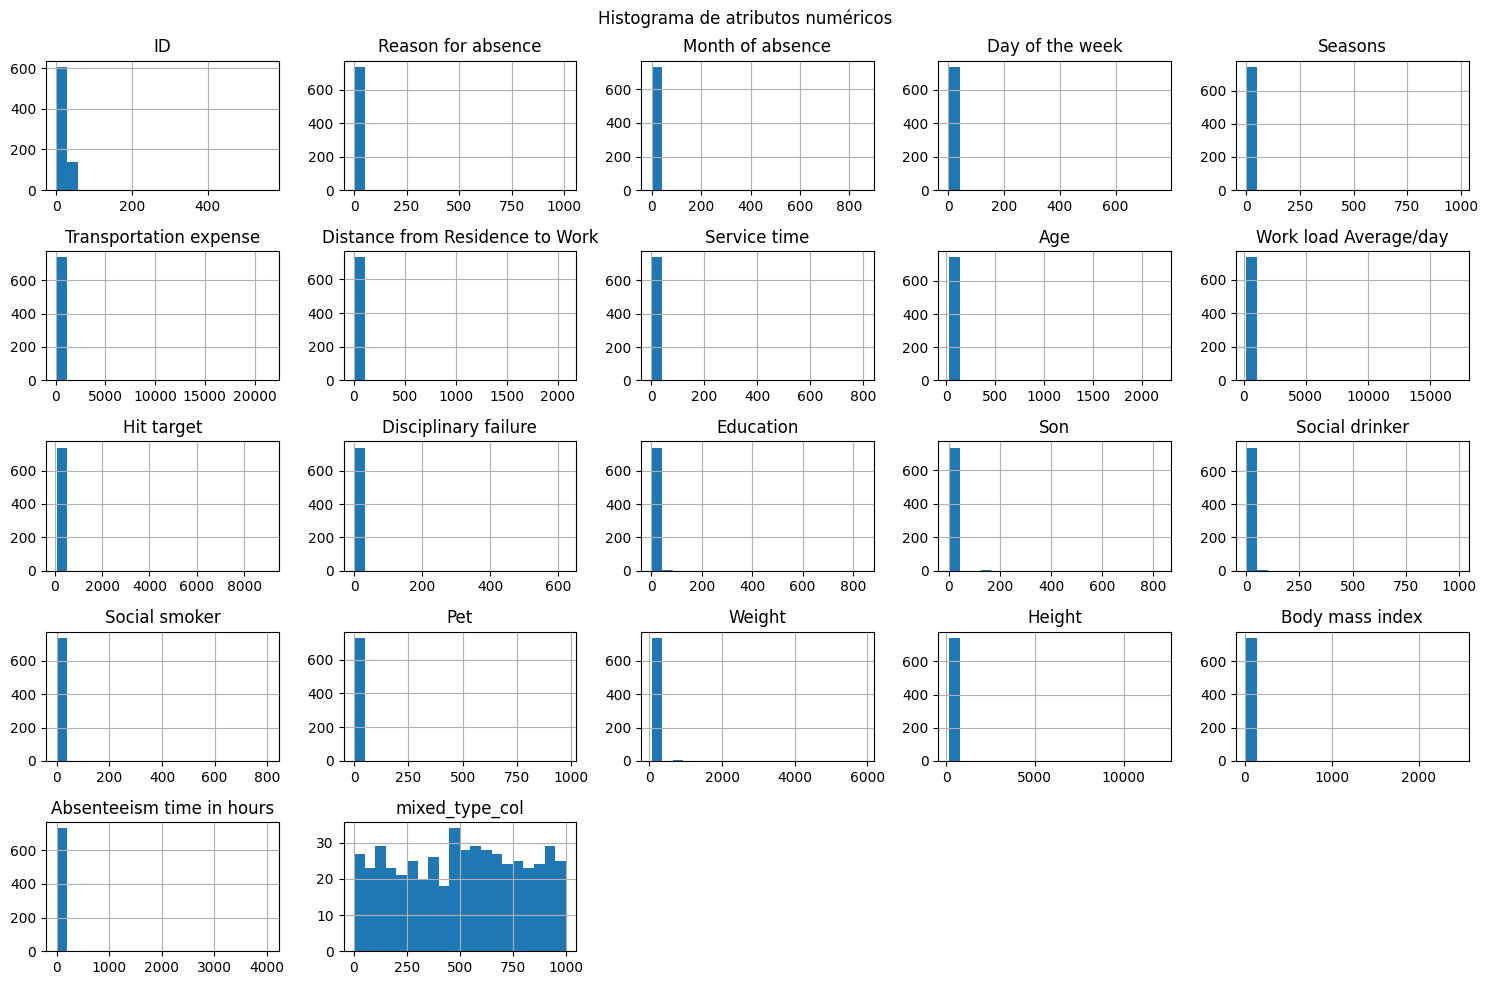

In [9]:
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograma de atributos numéricos")
plt.tight_layout()
plt.show()

Por como aparecen las distribuciones, se podría asumir que hay outliers en el rango superior. Esto se puede comprobar con boxplots.

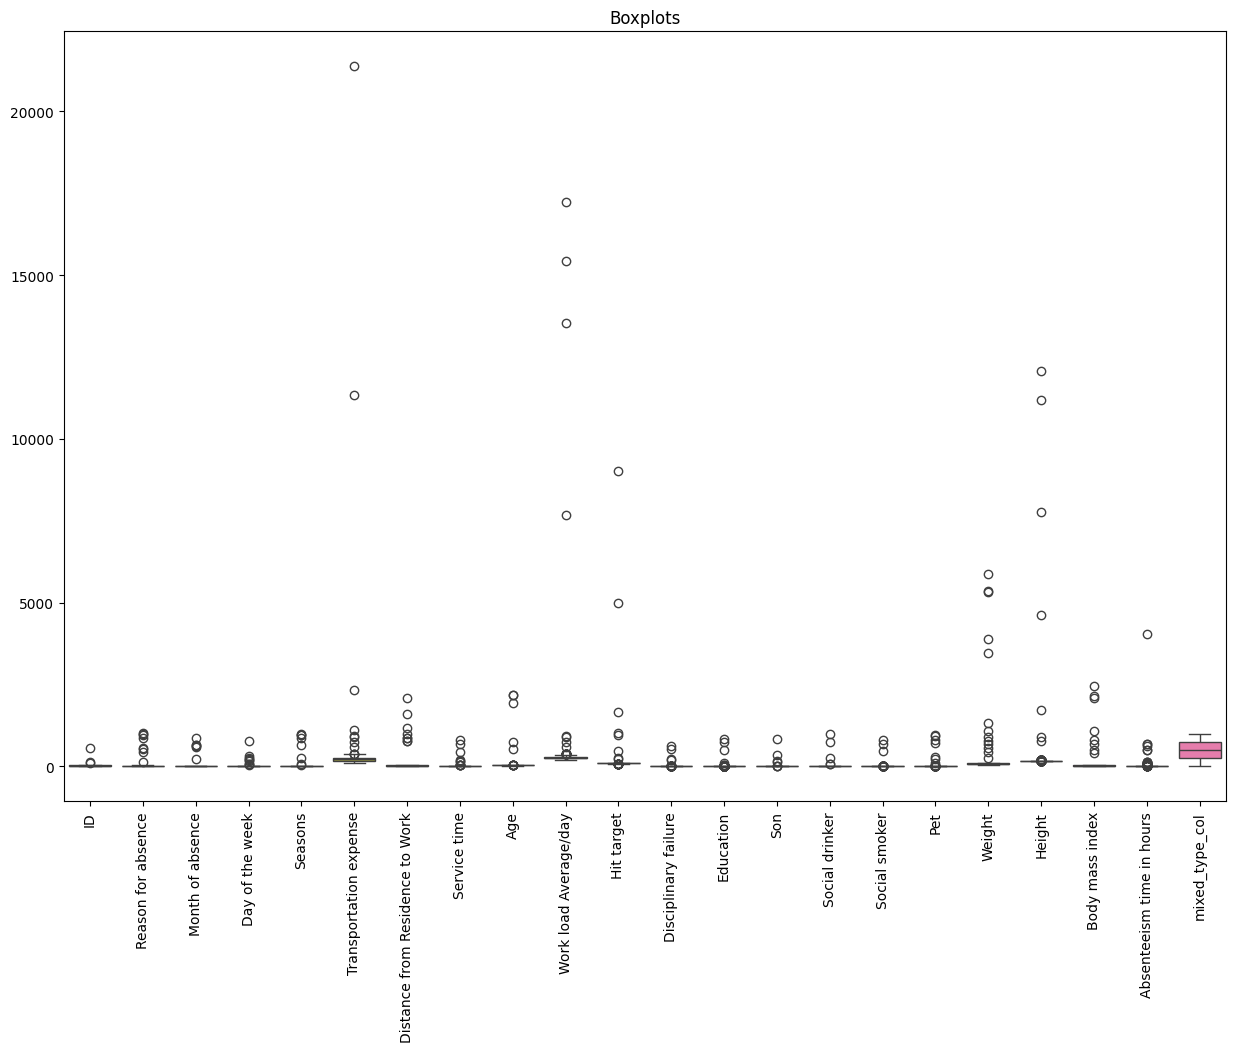

In [10]:
# Boxplot para identificar outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title("Boxplots")
plt.xticks(rotation=90)
plt.show()

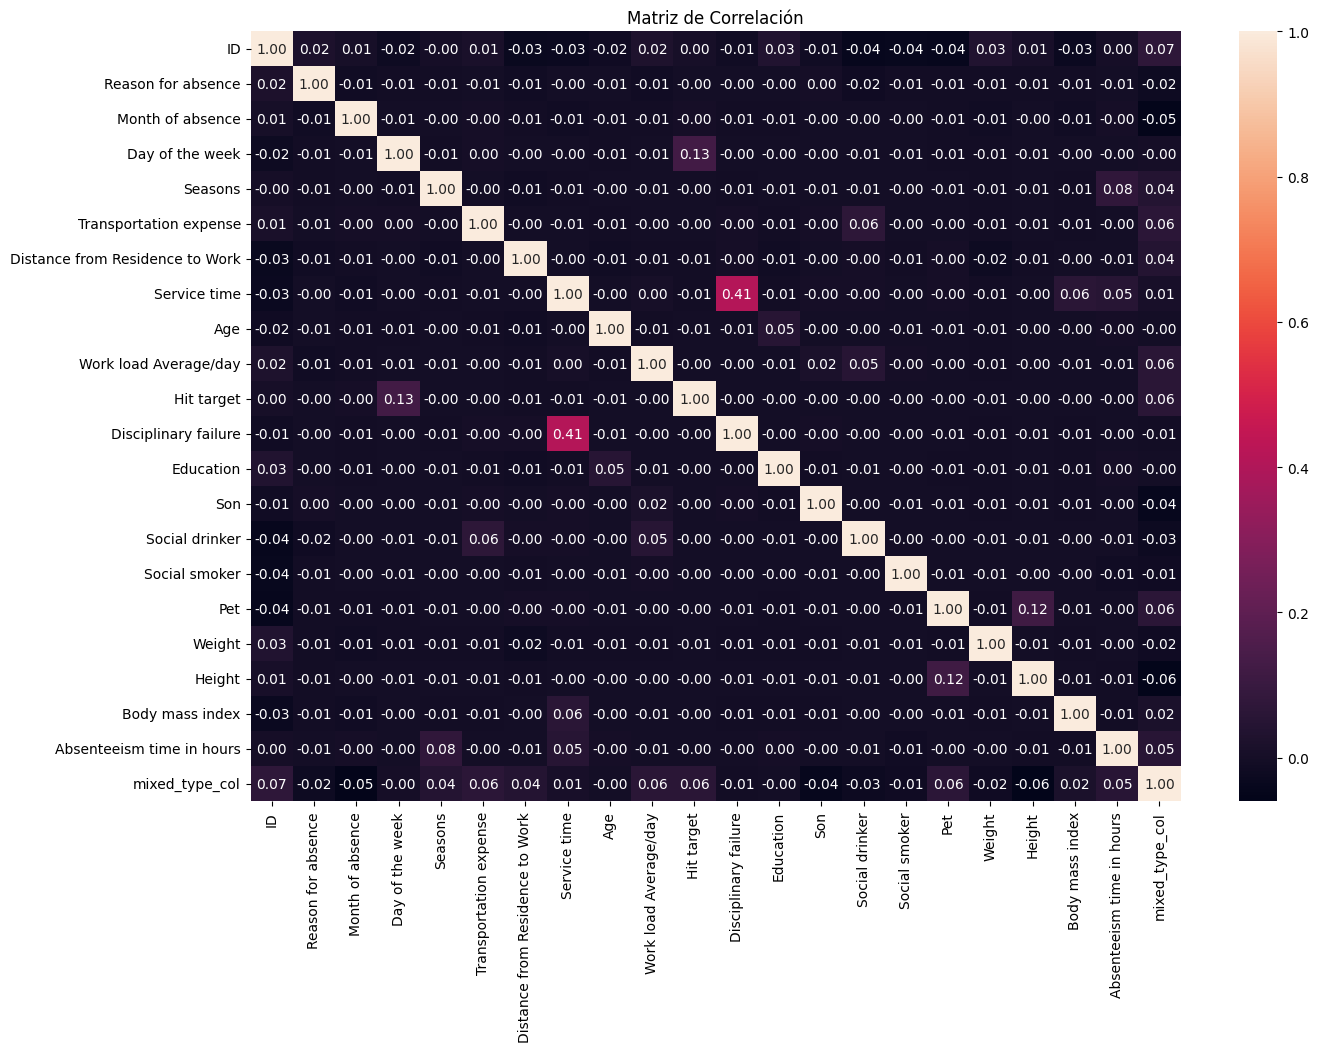

In [11]:
# Realizando heatmap de correlación
plt.figure(figsize=(15, 10))
mat_corr = df.corr()
sns.heatmap(mat_corr, annot=True, fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

Actualmente no vemos una relación entre variables, y se debe al rango de valores que tiene cada variable, por lo que tendremos que hacer limpieza y normalización de las variables.

In [12]:
%store df

Stored 'df' (DataFrame)
